# Retail sales analysis for understanding sales performance and customer trends.

# project goal:

This project analyzes 10,000 records of retail sales data to uncover key trends across cities, departments, customer types, and time periods. The goal is to support data-driven decisions related to marketing, operations, and customer strategy.

# Raw data loading and cleaning

In [63]:
import pandas as pd
df = pd.read_csv("/content/retail_customer_sales_data.csv")
df.head(10)

,date,customer_id,city,customer_type,service,department,sales_amount,margin_percent,sale_type,customer_source,package_type
0,2024-01-01 00:00:00,8270,PHOENIX,Returning,Consultation,Grocery,232.13,29.63,In-store,Facebook,Gold
1,2024-01-01 01:00:00,1860,New York,returning,Consultation,Pharmacy,NaN,NaN,In-store,Facebook,Standard
2,2024-01-01 02:00:00,6390,Phoenix,NaN,Premium,Grocery,437.76,25.03,In-store,Google,Gold
3,2024-01-01 03:00:00,6191,New York,Returning,PREMIUM,Clothing,NaN,NaN,In-store,Facebook,Platinum
4,2024-01-01 04:00:00,6734,Phoenix,New,NaN,Grocery,168.66,9.94,In-store,Instagram,Gold
5,2024-01-01 05:00:00,7265,Houston,New,Basic,grocery,NaN,NaN,In-store,Facebook,Platinum
6,2024-01-01 06:00:00,1466,Los Angeles,Returning,Basic,Electronics,580.54,6.1,in-Store,Google,Standard
7,2024-01-01 07:00:00,5426,Phoenix,Returning,Consultation,Electronics,NaN,NaN,Online,FACEBOOK,Standard
8,2024-01-01 08:00:00,6578,Houston,Returning,Consultation,Pharmacy,five hundred,5.04,Online,Referral,Standard
9,2024-01-01 09:00:00,9322,Chicago,Returning,Basic,Electronics,437.93,thirty,In-store,Instagram,Standard


In [64]:
df.isnull().sum()

,0
date,0
customer_id,0
city,0
customer_type,2
service,1
department,0
sales_amount,5
margin_percent,5
sale_type,0
customer_source,0


In [65]:
# 1. Stripping whitespace and standardizing capitalization for selected columns
columns_to_clean = ['city', 'customer_type', 'service', 'department', 'sale_type', 'customer_source']
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.strip().str.title()

# 2. Converting numeric columns with errors to numbers
df['sales_amount'] = pd.to_numeric(df['sales_amount'], errors='coerce')
df['margin_percent'] = pd.to_numeric(df['margin_percent'], errors='coerce')

# 3. Converting date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 4. Handling missing values
# Filling numeric columns with mean
df['sales_amount'] = df['sales_amount'].fillna(df['sales_amount'].mean())
df['margin_percent'] = df['margin_percent'].fillna(df['margin_percent'].mean())

# Filling categorical columns with mode
df['customer_type'] = df['customer_type'].fillna(df['customer_type'].mode()[0])
df['service'] = df['service'].fillna(df['service'].mode()[0])

# 5. Removing duplicates
df.drop_duplicates(inplace=True)

# 6. Reseting index
df.reset_index(drop=True, inplace=True)


In [66]:
# Saving cleaned file for further analysis
df.to_csv("cleaned_retail_sales.csv", index=False)

# Exploratory Data Analysis and Visualization



In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df1 = pd.read_csv("/content/cleaned_retail_sales.csv")

# Setting plot style
sns.set(style="whitegrid")

# 1. Basic Info & Summary Stats
print("Dataset Info:")
df1.info()
print("\nSummary Statistics:")
df1.describe(include='all')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9998 non-null   object 
 1   customer_id      10000 non-null  int64  
 2   city             10000 non-null  object 
 3   customer_type    10000 non-null  object 
 4   service          10000 non-null  object 
 5   department       10000 non-null  object 
 6   sales_amount     10000 non-null  float64
 7   margin_percent   10000 non-null  float64
 8   sale_type        10000 non-null  object 
 9   customer_source  10000 non-null  object 
 10  package_type     10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB

Summary Statistics:


,date,customer_id,city,customer_type,service,department,sales_amount,margin_percent,sale_type,customer_source,package_type
count,9998,10000.000000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000
unique,9998,NaN,5,3,4,4,NaN,NaN,2,4,3
top,2025-02-20 15:00:00,NaN,Los Angeles,New,Consultation,Clothing,NaN,NaN,In-Store,Facebook,Standard
freq,1,NaN,2083,5020,3368,2579,NaN,NaN,5040,2573,3373
mean,NaN,5462.898000,NaN,NaN,NaN,NaN,523.593995,17.462206,NaN,NaN,NaN
std,NaN,2589.212679,NaN,NaN,NaN,NaN,274.733255,7.211422,NaN,NaN,NaN
min,NaN,1001.000000,NaN,NaN,NaN,NaN,50.020000,5.000000,NaN,NaN,NaN
25%,NaN,3217.000000,NaN,NaN,NaN,NaN,287.407500,11.177500,NaN,NaN,NaN
50%,NaN,5477.000000,NaN,NaN,NaN,NaN,521.845000,17.495000,NaN,NaN,NaN
75%,NaN,7698.000000,NaN,NaN,NaN,NaN,762.790000,23.680000,NaN,NaN,NaN


In [68]:
# Unique values per column
df1.nunique()

,0
date,9998
customer_id,6002
city,5
customer_type,3
service,4
department,4
sales_amount,9507
margin_percent,2450
sale_type,2
customer_source,4


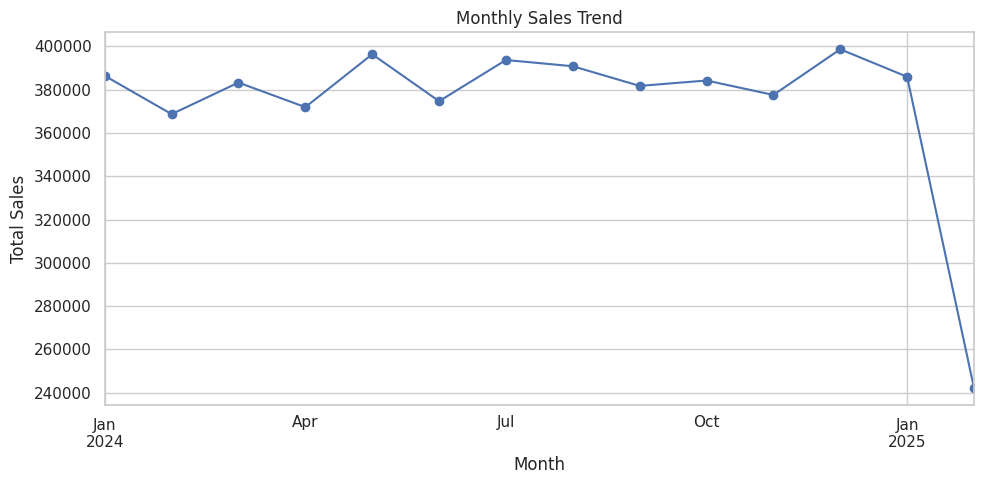

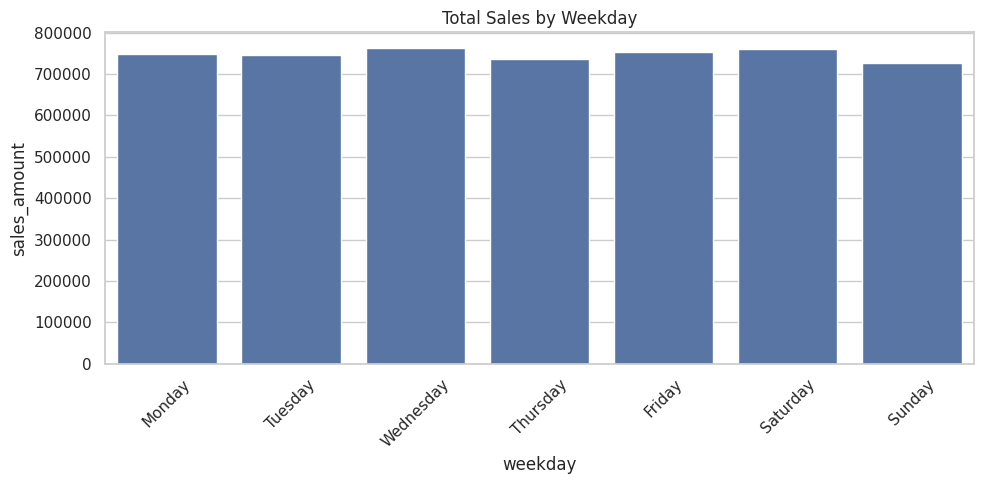

In [69]:
# Time Series Analysis
df1['date'] = pd.to_datetime(df['date'], errors='coerce')
df1['month'] = df['date'].dt.to_period('M')
df1['weekday'] = df['date'].dt.day_name()

# Monthly sales trend
monthly_sales = df1.groupby('month')['sales_amount'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='sales_amount', data=df1, estimator=sum, errorbar=None,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Total Sales by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q: What trends can be observed in monthly sales throughout the year?

A: Sales remained relatively stable between 370K–400K throughout 2024, with spikes in June, July, and December. A sharp drop is observed in January 2025, possibly due to partial month data or post-holiday season effects.

Q: Which days of the week have the highest and lowest total sales?

A: The highest sales are seen on Saturday, Friday, and Wednesday, while Sunday has the lowest total sales. However, the variation between days is relatively small, indicating consistent performance throughout the week.

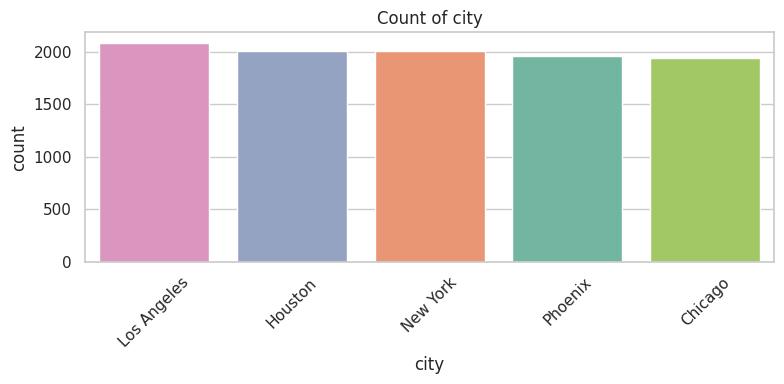

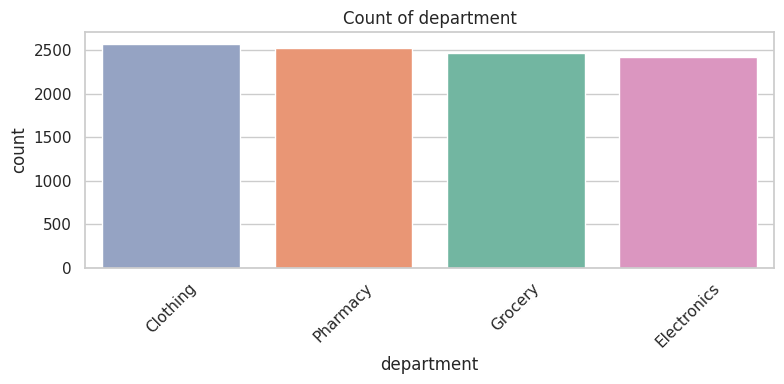

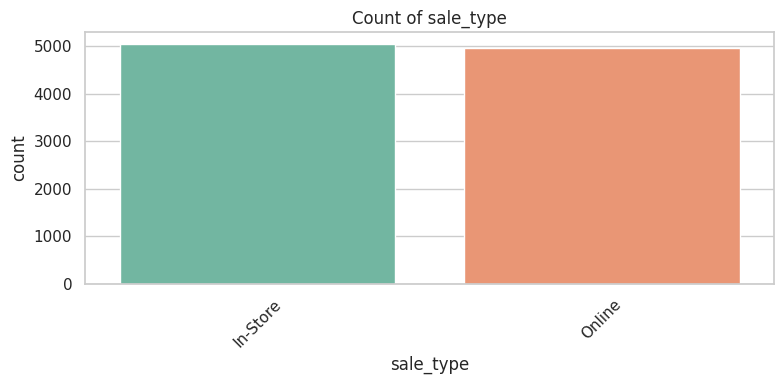

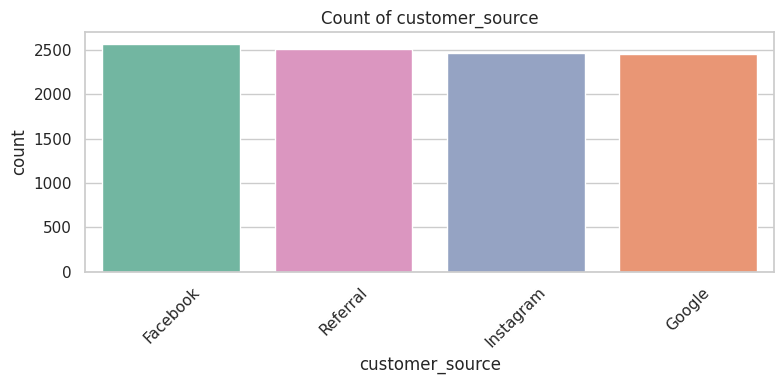

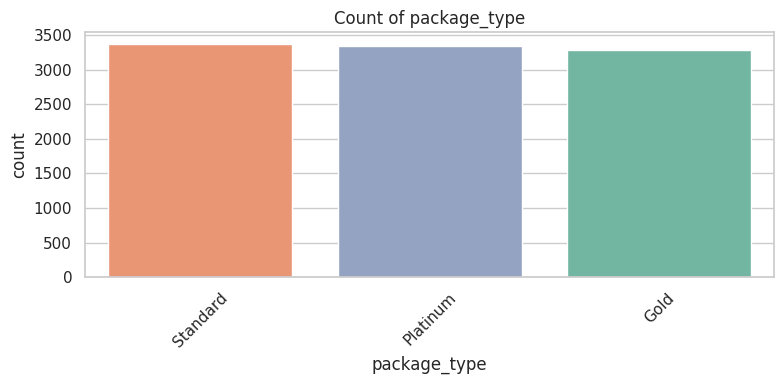

In [70]:
# Countplots for categorical features
categorical_cols = ['city', 'department', 'sale_type', 'customer_source', 'package_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x=col, hue=col, palette='Set2', legend=False,
                  order=df1[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Q: Which city has the most customer interactions?

A: Los Angeles appears most frequently, indicating it has the highest customer interaction.

Q: Which department sees the most action?

A: “Clothing” and “Pharmacy” departments are most common.

Q: What is the distribution of sale types?

A: The distribution between “In-store” and “Online” sales is nearly equal, indicating that customers engage with both sales channels almost evenly.

Q: Which customer source is most effective?

A: “Facebook” appears to be the leading customer source.

Q: Which package type is most popular?

A: “Standard” packages are the most purchased.



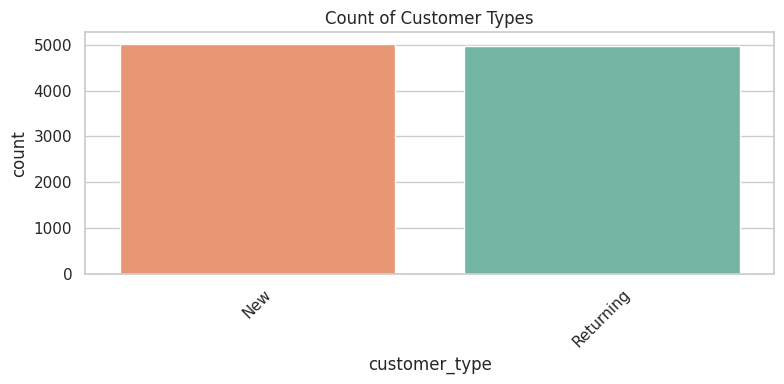

In [71]:
# Countplot of Customer Types (New vs Returning)

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df1[df1['customer_type'].isin(['New', 'Returning'])],
    x='customer_type',
    hue='customer_type',
    palette='Set2',
    legend=False,
    order=['New', 'Returning']
)
plt.title('Count of Customer Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q: What is the most common customer type?

A: Both “New” and “Returning” customers are almost equally represented, indicating a healthy balance between acquiring new customers and retaining existing ones.

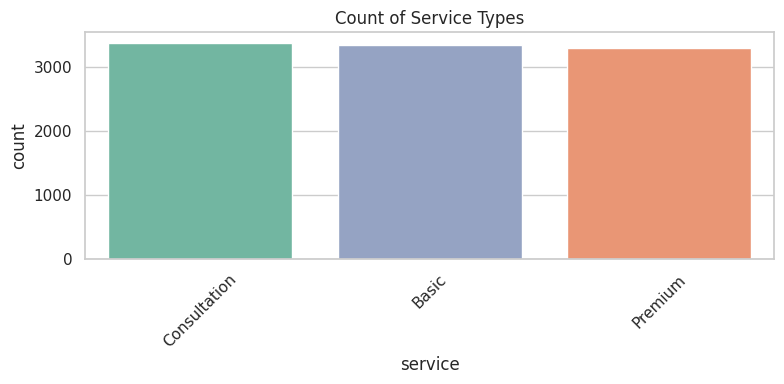

In [72]:
# Countplot of different service types offered

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df1[df1['service'].isin(['Consultation', 'Basic', 'Premium'])],
    x='service',
    hue='service',
    palette='Set2',
    legend=False,
    order=['Consultation', 'Basic', 'Premium']
)
plt.title('Count of Service Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q: Is there any significant imbalance in service offerings?

A: No major imbalance is observed. The counts are quite close, which may reflect either equal demand or balanced strategy by the business.

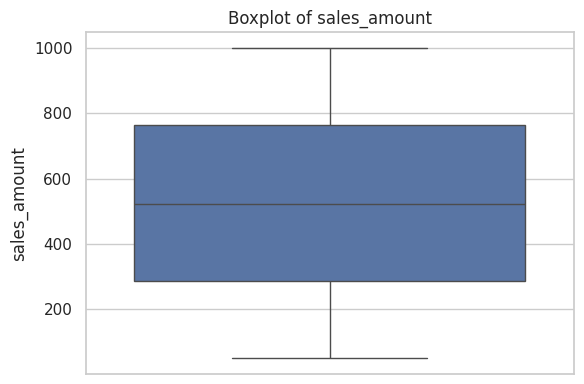

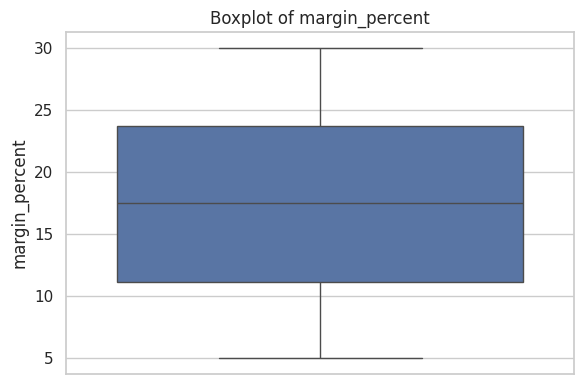

In [73]:
# Boxplot to detect outliers

numeric_cols = ['sales_amount', 'margin_percent']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Q: What does the margin percent distribution tell us about profitability?

A: The margin percent is centered around 17-18%, with most values ranging between 11% and 25%. There are no significant outliers, suggesting consistent and stable profitability margins across transactions.

## Conclusion:

This retail sales analysis helped uncover meaningful insights from customer behavior, location trends, and service preferences using 10,000 records of transaction data.

Top City: **Los Angeles** leads in customer interactions—ideal for expansion.

Best Departments: **Clothing** and **Pharmacy** draw the most attention.

Customer Mix: Balanced split between New and Returning customers.

Sales Channels: In-store and Online perform equally well.

Top Source: **Facebook** dominates customer acquisition.

Profit Margins: Stable between **11%–25%**.

Sales Peaks: Highest in **June, July, and December—Fridays and Saturdays** perform best.


-----To complement the analysis, I have created a clean, interactive Excel dashboard for a non-technical audience to easily explore key metrics.

Where to find it?
The dashboard is available in the /dashboard folder of this project repository:
dashboard/Retail_Sales_Dashboard.xlsx